
# Clasificación con scikit-learn

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />


## 1. Clasificación

En clasificación, la etiqueta es discreta, por ejemplo Spam y No Spam. En otras palabras, se proporciona una distinción clara entre las categorías. Es más, es importante indicar que estas categorías son nominales y no ordinales. Las variables nominales y ordinales son ambas subcategorías de las variables categóricas. Las variables ordinales tienen asociado un orden, por ejemplo, las tallas de las camisetas "XL > L > M > S". Por el contrario, las variables nominales no implican un orden, por ejemplo, no podemos asumir (en general) "naranja > azul > verde".

Usaremos el dataset Iris, el cual fue recolectado por el estadístico y biólogo Ronal Fisher. El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: lo largo y lo ancho del sépalos y pétalos, en centímetros. 

Cargaremos el dataset de Iris desde la librería scikit-learn. Al cargar el dataset notaremos que se incluye la meta-data y que las clases ya vienen convertidas en números

- 0=Iris-Setosa
- 1=Iris-Versicolor
- 2=Iris-Virginica.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
iris_labels=iris.target_names
iris_labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Creamos un dataframe a partir del dataset cargado desde scikit-learn

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["class"]=iris.target

print("Tamaño del dataset: ", len(iris_df))
iris_df.head()

Tamaño del dataset:  150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Imprimimos los valores únicos que aparecen en el campo class

iris_df['class'].unique()

array([0, 1, 2])

En aprendizaje supervisado se necesitan datos para entrenar el modelo y validarlo. Se suele hablar de tres categorías,

- training set (60% del dataset): Es usado para entrenar o construir el modelo. En esta fase se crean modelos usando multiples algoritmos para luego comparar sus respectivos desempeños.

- cross validation set (20% del dataset): Es usado para comparar el rendimiento de los diferentes modelos entrenados en la etapa anterior. Se emplea para elegir el modelo final.

- test set (20% del dataset): Es usado para determinar el rendimiento del modelo final. Se estima el error de la predicción del modelo.


Por simplicidad, en general se suelen dividir el dataset original en un training set y un test set. La regla esa usar un 70% para el training  y un 30% para el test.

Usaremos la función `train_test_split` de scikit-learn para generar el training y test.

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(iris_df, test_size=0.3)

print("Tamaño del train set: ", len(df_train))
print("Tamaño del test set: ", len(df_test))

Tamaño del train set:  105
Tamaño del test set:  45


In [7]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
1,4.9,3.0,1.4,0.2,0
85,6.0,3.4,4.5,1.6,1
119,6.0,2.2,5.0,1.5,2
29,4.7,3.2,1.6,0.2,0


In [8]:
df_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
68,6.2,2.2,4.5,1.5,1
136,6.3,3.4,5.6,2.4,2
142,5.8,2.7,5.1,1.9,2
128,6.4,2.8,5.6,2.1,2
98,5.1,2.5,3.0,1.1,1


In [9]:
print("Numero de objetos por clase en dataset:\n", iris_df['class'].value_counts(sort=False))
print("Numero de objetos por clase en train set:\n", df_train['class'].value_counts(sort=False))
print("Numero de objetos por clase en test set:\n", df_test['class'].value_counts(sort=False))

Numero de objetos por clase en dataset:
 0    50
1    50
2    50
Name: class, dtype: int64
Numero de objetos por clase en train set:
 0    36
1    36
2    33
Name: class, dtype: int64
Numero de objetos por clase en test set:
 0    14
1    14
2    17
Name: class, dtype: int64


In [10]:
# Agregamos el parámetro stratify para conservar las proporciones del dataset original

df_train, df_test = train_test_split(iris_df, test_size=0.3, stratify=iris_df['class'])

In [11]:
print("Numero de objetos por clase en dataset:\n", iris_df['class'].value_counts(sort=False))
print("Numero de objetos por clase en train set:\n", df_train['class'].value_counts(sort=False))
print("Numero de objetos por clase en test set:\n", df_test['class'].value_counts(sort=False))

Numero de objetos por clase en dataset:
 0    50
1    50
2    50
Name: class, dtype: int64
Numero de objetos por clase en train set:
 0    35
1    35
2    35
Name: class, dtype: int64
Numero de objetos por clase en test set:
 0    15
1    15
2    15
Name: class, dtype: int64


Es conveniente ser explícito en que columnas serán las variables predictoras y la columna que corresponde a la predicción. Para ellos definiremos las variables X_train, y_train, X_test, y_test

Por simplicida, usaremos solamente las columnas petal_length y petal_width como features para construir el modelo. Estas columnas corresponden a los indices 2 y 3.

In [12]:
X_train=np.array(df_train.iloc[:,2:4])
y_train=np.array(df_train.iloc[:,4])

X_test=np.array(df_test.iloc[:,2:4])
y_test=np.array(df_test.iloc[:,4])

In [13]:
print("Min: ", X_train.min(axis=0))
print("Max: ", X_train.max(axis=0))
print("Mean: ", X_train.mean(axis=0))
print("Std Dev: ", X_train.std(axis=0))

Min:  [1.1 0.1]
Max:  [6.7 2.5]
Mean:  [3.75809524 1.1847619 ]
Std Dev:  [1.7490014  0.74728473]


Es necesario normalizar los features almacenados en X_train y Y_train. Para ellos usaramos la función `StandardScaler`

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
print("Min: ", X_train_std.min(axis=0))
print("Max: ", X_train_std.max(axis=0))
print("Mean: ", X_train_std.mean(axis=0))
print("Std Dev: ", X_train_std.std(axis=0))

Min:  [-1.51977879 -1.45160454]
Max:  [1.68204826 1.76002271]
Mean:  [-7.71869341e-16  3.72189052e-16]
Std Dev:  [1. 1.]


In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Definiremos una función llamada plot_decision_regions() la cual será usada graficar los resultados de la clasificación de los modelos

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# Función para graficar los bordes de decisión para datasets 2-dimensionales

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [18]:
X_combined_std.shape

(150, 2)

In [19]:
X_train_std.shape

(105, 2)

## 1.1 Crear modelo de clasificación usando un Support Vector Classifier (SVC)

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

svm

SVC(kernel='linear', random_state=1)

In [21]:
y_pred=svm.predict(X_test_std)
y_pred

array([2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2,
       2])

In [22]:
pd.DataFrame({"observado":y_test, "prediccion":y_pred})

,observado,prediccion
0,2,2
1,1,1
2,0,0
3,2,2
4,2,2
5,0,0
6,0,0
7,1,1
8,1,1
9,2,2


<ipython-input-17-99a882847931>:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


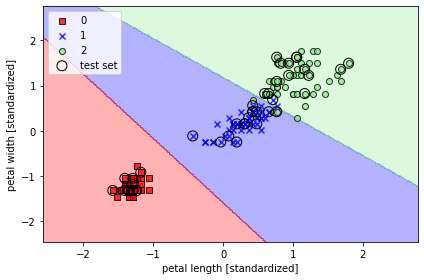

In [23]:
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Los símbolos de colores corresponden a las tres diferentes clases que existen en el dataset. Los círculos de color negro que encierran a los símbolos corresponde al test set, lo cual permite visualizar cuan bien funciona la separación.

In [24]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [25]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [26]:
# Función para imprimir la matriz de confusión usando etiquetas

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [27]:
print_cm(confusion_matrix(y_test, y_pred), iris_labels )

                   setosa versicolor  virginica 
        setosa       15.0        0.0        0.0 
    versicolor        0.0       14.0        1.0 
     virginica        0.0        1.0       14.0 


## 1.2 Crear modelo de clasificación usando un Regresión logística (LogisticRegression)

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

lr

LogisticRegression(C=100.0, random_state=1)

In [29]:
y_pred=lr.predict(X_test_std)
y_pred

array([2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2,
       2])

In [30]:
pd.DataFrame({"observado":y_test, "prediccion":y_pred})

,observado,prediccion
0,2,2
1,1,1
2,0,0
3,2,2
4,2,2
5,0,0
6,0,0
7,1,1
8,1,1
9,2,2


<ipython-input-17-99a882847931>:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


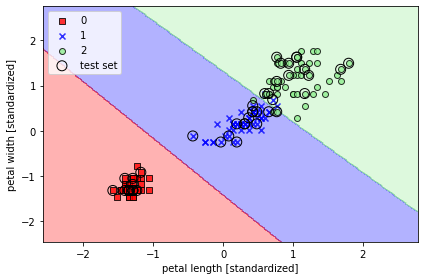

In [31]:
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=lr, 
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [33]:
print_cm(confusion_matrix(y_test, y_pred), iris_labels )

                   setosa versicolor  virginica 
        setosa       15.0        0.0        0.0 
    versicolor        0.0       14.0        1.0 
     virginica        0.0        1.0       14.0 
